In [2]:
import pandas as pd

# Update this path if your Titanic CSV is in a different location
df = pd.read_csv('train.csv')

# Show the first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Get info about the DataFrame (column types and non-null counts)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Get summary statistics for numerical columns
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Number of missing values in each column
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Countplot of the target variable
df['Survived'].value_counts()



Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
# Distribution of passenger classes
df['Pclass'].value_counts()


Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
df['Sex'].value_counts()


Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
df['Embarked'].value_counts()



Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

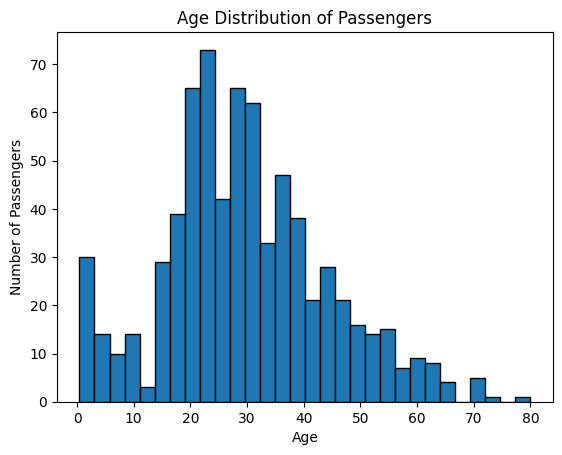

In [11]:
import matplotlib.pyplot as plt

plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')
plt.show()


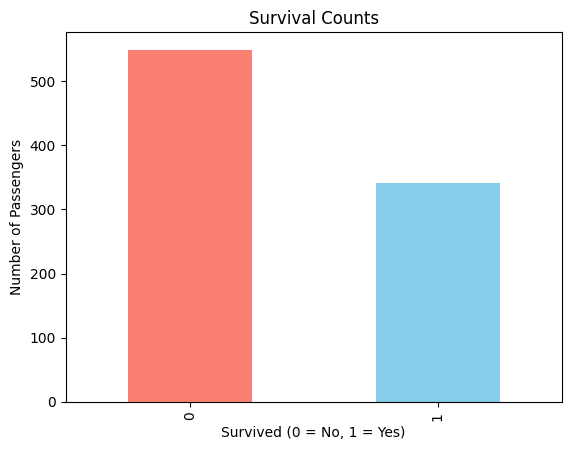

In [12]:
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'skyblue'])
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Number of Passengers')
plt.title('Survival Counts')
plt.show()


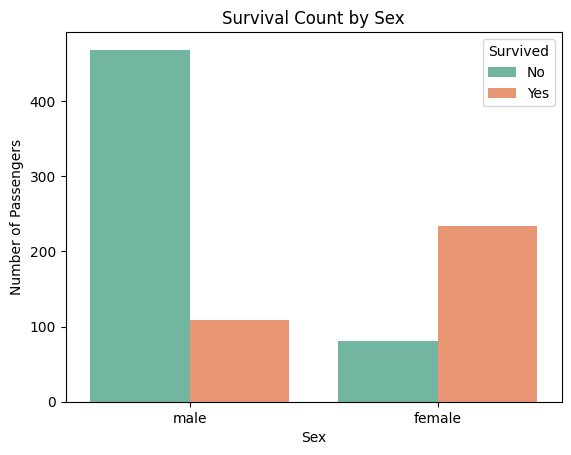

In [13]:
import seaborn as sns

sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


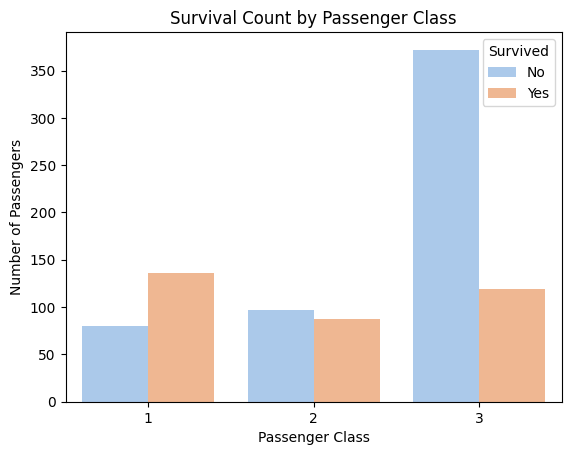

In [14]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette='pastel')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [15]:
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [19]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [20]:
df.drop('Cabin', axis=1, inplace=True)


In [21]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [22]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [25]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [27]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [28]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [30]:
df[['Sex', 'Embarked', 'FamilySize', 'IsAlone', 'Title']].head()


,Sex,Embarked,FamilySize,IsAlone,Title
0,0,0,2,0,Mr
1,1,1,2,0,Mrs
2,1,0,1,1,Miss
3,1,0,2,0,Mrs
4,0,0,1,1,Mr
